<a href="https://colab.research.google.com/github/Susovan88/Machine_Learning/blob/main/Linear%20Regression/my_linear_regression_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
class My_LinearRegression():
  def __init__(self):
    self.m=None
    self.b=None

  def fit(self,x_train,y_train):
    num=0
    dmo=0
    for i in range(x_train.shape[0]):
      num=num+((y_train[i] - y_train.mean())*(x_train[i]-x_train.mean()))
      dmo+=(x_train[i]-x_train.mean())**2

    self.m=num/dmo
    self.b=y_train.mean()-self.m*x_train.mean()
    print(f' m is -> {self.m}  , b is -> {self.b}')

  def predict(self,x_test):
    if(self.m is None or self.b is None):
      print("Model is not fit with datasets.")
      return None
    return self.m*x_test +self.b


In [74]:
df=pd.read_csv('/content/placement.csv')

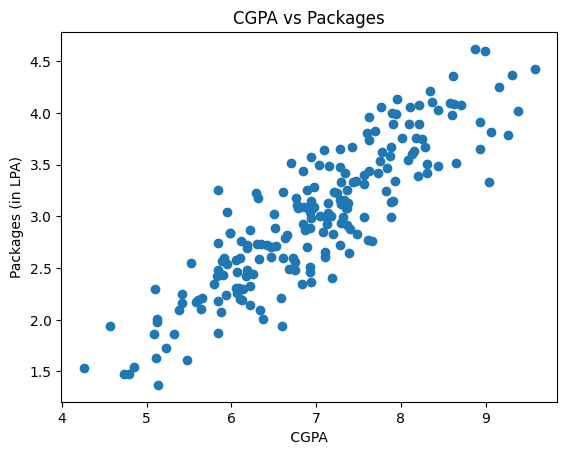

In [75]:

plt.scatter(df['cgpa'],df['package'])
plt.title("CGPA vs Packages")
plt.xlabel(" CGPA ")
plt.ylabel("Packages (in LPA)")
plt.show()

In [76]:
x=df.iloc[:,0:1].values
y=df.iloc[:,1:2].values

In [77]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [78]:
lr=My_LinearRegression()

In [79]:
lr.fit(x_train,y_train)

 m is -> [0.55795197]  , b is -> [-0.89611192]


In [80]:
y_pred=lr.predict(x_test)

In [81]:
y_test

array([[4.1 ],
       [3.49],
       [2.08],
       [2.33],
       [1.94],
       [1.48],
       [1.86],
       [3.09],
       [4.21],
       [2.87],
       [3.65],
       [4.  ],
       [2.89],
       [2.6 ],
       [2.99],
       [3.25],
       [1.86],
       [3.67],
       [2.37],
       [3.42],
       [2.48],
       [3.65],
       [2.6 ],
       [2.83],
       [4.08],
       [2.56],
       [3.58],
       [3.81],
       [4.09],
       [2.01],
       [3.63],
       [2.92],
       [3.51],
       [1.94],
       [2.21],
       [3.34],
       [3.34],
       [3.23],
       [2.01],
       [2.61]])

In [82]:
lr.m * 9.2 + lr.b

array([4.23704623])

In [83]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [84]:
print(f" MAE -> {mean_absolute_error(y_test,y_pred)}")  ## unit -> lpa
print(f" MSE -> {mean_squared_error(y_test,y_pred)}")   ## unit -> lpa**2
print(f" RMSE -> {np.sqrt(mean_squared_error(y_test,y_pred))}")  ## unit -> lpa

 MAE -> 0.2884710931878174
 MSE -> 0.12129235313495523
 RMSE -> 0.3482705171773161


In [85]:
r2=r2_score(y_test,y_pred)
print(f" r2 is -> {r2}")

adj_r2=1-((1-r2)*((y_test.shape[0]-1))/(y_test.shape[0]-1-1))

print(f" adj r2 -> {adj_r2}")

 r2 is -> 0.7807301475103842
 adj r2 -> 0.7749598882343417


## why adj. r2 needs

In [102]:
df2=df.copy()

df2['random_feature']=np.random.randint(-12,12,200) ## add use less feature to check
df2=df2[['cgpa','random_feature','package']]

df2.head()

,cgpa,random_feature,package
0,6.89,2,3.26
1,5.12,-5,1.98
2,7.82,-5,3.25
3,7.42,-12,3.67
4,6.94,-1,3.57


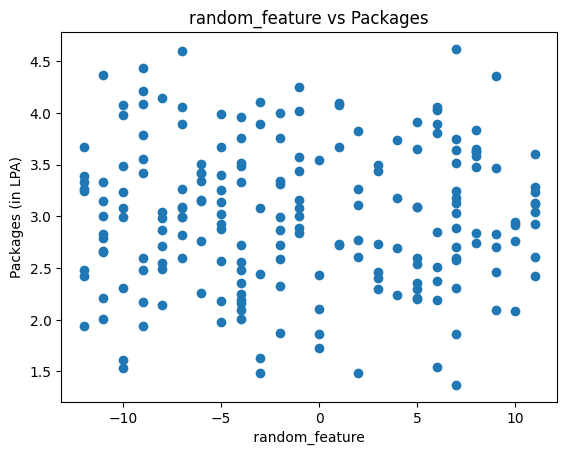

In [103]:

plt.scatter(df2['random_feature'],df2['package'])
plt.title("random_feature vs Packages")
plt.xlabel(" random_feature ")
plt.ylabel("Packages (in LPA)")
plt.show()

In [104]:
x=df2.iloc[:,0:2].values
y=df2.iloc[:,-1].values

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
lr=LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [106]:
y_pred=lr.predict(x_test)
y_pred

array([3.90580354, 3.04369757, 2.44548768, 2.56825987, 1.58866506,
       1.79052122, 2.11523485, 2.96577914, 3.72084928, 2.89825686,
       4.12975966, 3.50839799, 2.97120463, 2.43415342, 3.13883059,
       3.44675604, 1.94715405, 3.18354222, 3.01617211, 3.39076701,
       2.49522682, 3.21768713, 2.90427933, 3.17854314, 3.63687995,
       2.85360209, 3.54785468, 3.38551208, 3.87753897, 1.90207286,
       3.70454437, 3.27370459, 3.7153385 , 2.74153875, 2.81468551,
       3.24526945, 3.52518617, 2.68055063, 2.6409518 , 2.78127972])

In [107]:
r2=r2_score(y_test,y_pred)
print(f" r2 is -> {r2}")

adj_r2=1-((1-r2)*((y_test.shape[0]-1))/(y_test.shape[0]-1-1))

print(f" adj r2 -> {adj_r2}") ## r2 decrease for useless feature add


 r2 is -> 0.7707516969291188
 adj r2 -> 0.7647188468483062
